# Mathematical Tools for Finance
## Approximation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return np.sin(x) + 0.5 * x

In [3]:
def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10,6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

In [4]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

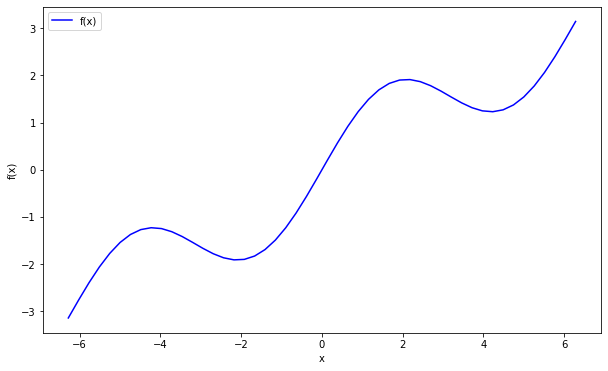

In [5]:
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x','f(x)'])

## Regression

$$min_{\alpha_{1}\cdots\alpha_{D}} \frac{1}{I}\sum_{i=1}^{I}\left(y_{i}-\sum_{d=1}^{D}\alpha_{d}\cdot\beta_{d}(x_{i})\right)$$

In [6]:
res = np.polyfit(x, f(x), deg=1, full=True) # lin reg

In [7]:
res # Full results

(array([ 4.28841952e-01, -7.06541606e-17]),
 array([21.03238686]),
 2,
 array([1., 1.]),
 1.1102230246251565e-14)

In [8]:
ry = np.polyval(res[0], x) # Eval Reg param

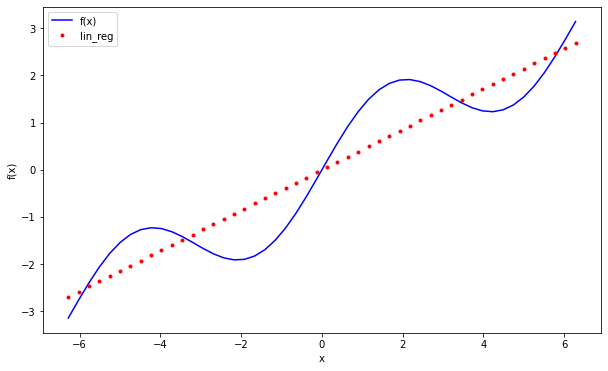

In [11]:
create_plot([x,x],[f(x), ry], ['b', 'r.'], ['f(x)','lin_reg'], ['x','f(x)'])

In [12]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

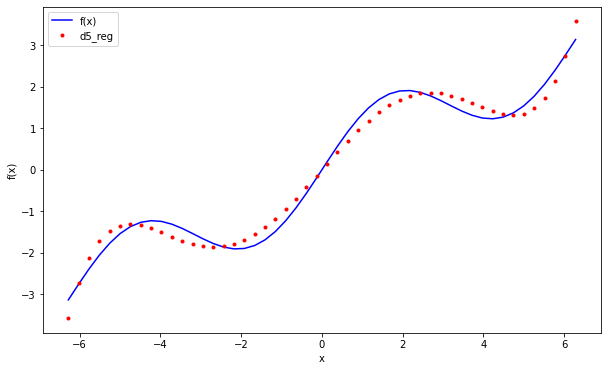

In [13]:
create_plot([x,x],[f(x), ry], ['b', 'r.'], ['f(x)','d5_reg'], ['x','f(x)'])

In [15]:
reg = np.polyfit(x, f(x), deg=7)
ry = np.polyval(reg, x)

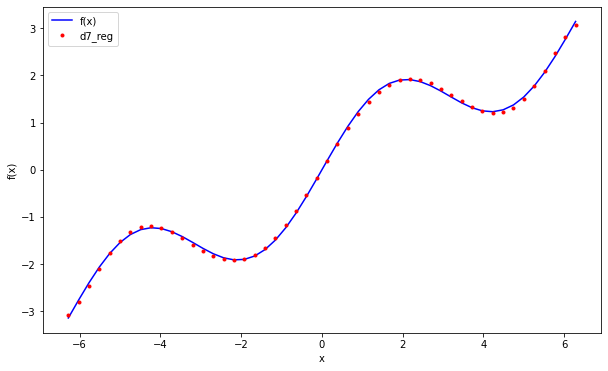

In [16]:
create_plot([x,x],[f(x), ry], ['b', 'r.'], ['f(x)','d7_reg'], ['x','f(x)'])

In [17]:
np.allclose(f(x), ry) # Check func and reg value are same (or at least close)

False

In [21]:
# MSE
np.mean((f(x)- ry)**2)

0.001776913475951775

## Individual Basis Functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x):
    return np.sin(x) + 0.5 * x

In [ ]:
def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10,6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

In [ ]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

In [22]:
mat = np.zeros((3+1, len(x)))

In [23]:
mat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [24]:
mat[3, :] = x**3 #cubic
mat[2, :] = x**2
mat[1, :] = x
mat[0, :] = 1 # constant

In [25]:
reg = np.linalg.lstsq(mat.T, f(x), rcond=None)[0]

In [28]:
reg.round(4) # optimal reg params

array([ 0.    ,  0.5628, -0.    , -0.0054])

In [29]:
ry = np.dot(reg, mat)

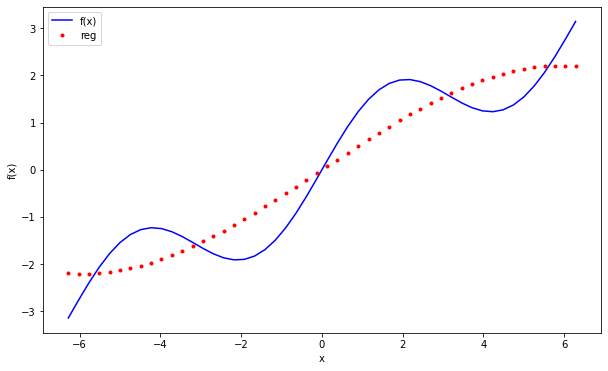

In [30]:
create_plot([x,x], [f(x), ry], ['b','r.'], ['f(x)', 'reg'], ['x', 'f(x)'])

In [32]:
mat[3, :] = np.sin(x)

In [33]:
reg = np.linalg.lstsq(mat.T, f(x), rcond=None)[0]

In [34]:
ry = np.dot(reg, mat)

In [35]:
np.allclose(f(x), ry)

True

In [36]:
np.mean((f(x)-ry)**2)

2.244709868782211e-31

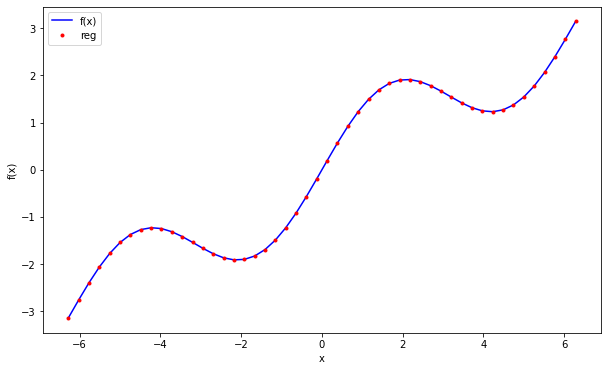

In [37]:
create_plot([x,x], [f(x), ry], ['b','r.'], ['f(x)', 'reg'], ['x', 'f(x)'])

## Noisy Data